In [1]:
import findspark

In [2]:
from pyspark.mllib.clustering import KMeans, KMeansModel
from pyspark.sql import SparkSession
from pyspark.ml.feature import StandardScaler
from pyspark.ml.linalg import Vectors, VectorUDT
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import  KMeans
from pyspark.sql import SQLContext, Window
from pyspark.sql.functions import *
import pandas as pd
import glob
import yaml
import csv
import numpy as np

In [3]:
spark = SparkSession.builder.appName('data_analysis').getOrCreate()
deliveries_df = spark.read .format("csv").option("header", "true").load("deliveries_2019.csv")
matches_df = spark.read .format("csv").option("header", "true").load("matches_2019.csv")

In [4]:
deliveries = deliveries_df.toPandas()


In [5]:
import numpy as np
deliveries.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Capitals','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DCap','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,None,None,None
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,None,None,None
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,None,None,None
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,None,None,None
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,CSK,MI,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,None,None,None
179074,11415,2,CSK,MI,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,None,None,None
179075,11415,2,CSK,MI,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,CSK,MI,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,None,None,None


In [6]:
deliveries_df.createOrReplaceTempView("data")

In [7]:
deliveries_df.dtypes

[('match_id', 'string'),
 ('inning', 'string'),
 ('batting_team', 'string'),
 ('bowling_team', 'string'),
 ('over', 'string'),
 ('ball', 'string'),
 ('batsman', 'string'),
 ('non_striker', 'string'),
 ('bowler', 'string'),
 ('is_super_over', 'string'),
 ('wide_runs', 'string'),
 ('bye_runs', 'string'),
 ('legbye_runs', 'string'),
 ('noball_runs', 'string'),
 ('penalty_runs', 'string'),
 ('batsman_runs', 'string'),
 ('extra_runs', 'string'),
 ('total_runs', 'string'),
 ('player_dismissed', 'string'),
 ('dismissal_kind', 'string'),
 ('fielder', 'string')]

In [8]:
deliveries_df.dtypes
p=spark.sql("select distinct(bowler), sum(total_runs) as runs_given from data group by bowler order by runs_given desc").collect()

In [9]:
count = []
bowler = []

for i in range(15):
    count.append(p[i].runs_given)
    bowler.append(p[i].bowler)
    
dictionary = [[x,y] for x,y in zip(bowler, count)]
print(dictionary)

[['PP Chawla', 4153.0], ['Harbhajan Singh', 4050.0], ['A Mishra', 3850.0], ['DJ Bravo', 3733.0], ['UT Yadav', 3640.0], ['SL Malinga', 3511.0], ['R Ashwin', 3391.0], ['P Kumar', 3342.0], ['B Kumar', 3264.0], ['RA Jadeja', 3221.0], ['R Vinay Kumar', 3043.0], ['SP Narine', 2939.0], ['Z Khan', 2860.0], ['SR Watson', 2751.0], ['IK Pathan', 2711.0]]


In [10]:
import matplotlib.pyplot as plt
plt.gcf().set_size_inches(20,6)
plt.xlabel('Bowler')
plt.ylabel('Runs_given')
plt.title('Highest runs_giving bowlers')
plt.bar(bowler, count, color = '#7D3C98')
plt.show()

<Figure size 2000x600 with 1 Axes>

In [11]:
p=spark.sql("select distinct(bowler), sum(total_runs) as runs_given from data group by bowler order by runs_given").collect()

In [12]:
count = []
bowler = []

for i in range(15):
    count.append(p[i].runs_given)
    bowler.append(p[i].bowler)
    
dictionary = [[x,y] for x,y in zip(bowler, count)]
print(dictionary)

[['AC Gilchrist', 0.0], ['AM Rahane', 5.0], ['SPD Smith', 5.0], ['LA Carseldine', 6.0], ['SS Mundhe', 6.0], ['SN Khan', 6.0], ['Y Gnaneswara Rao', 7.0], ['KS Williamson', 7.0], ['SA Yadav', 8.0], ['RS Gavaskar', 8.0], ['Sachin Baby', 8.0], ['S Dube', 9.0], ['H Vihari', 9.0], ['RA Shaikh', 11.0], ['RA Tripathi', 12.0]]


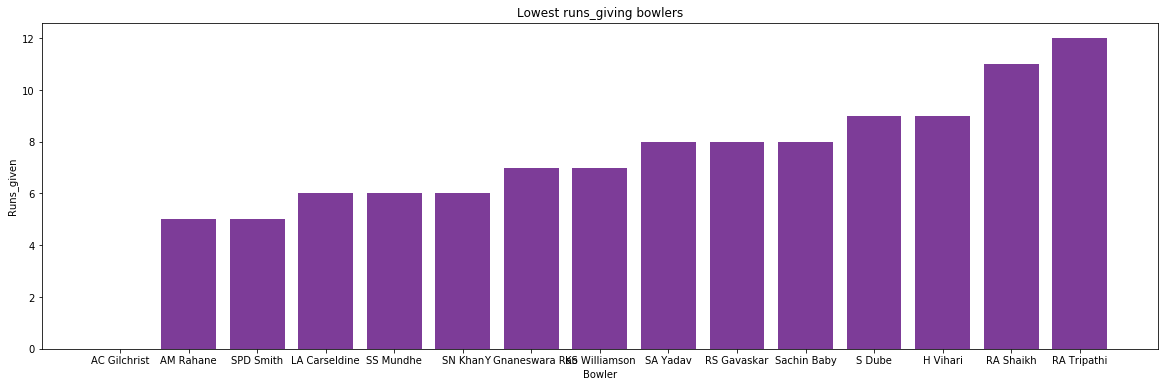

In [13]:
import matplotlib.pyplot as plt
plt.gcf().set_size_inches(20,6)
plt.xlabel('Bowler')
plt.ylabel('Runs_given')
plt.title('Lowest runs_giving bowlers')
plt.bar(bowler, count, color = '#7D3C98')
plt.show()

In [14]:
k=spark.sql("select distinct(fielder) ,count(fielder) as count from data where fielder is not null group by fielder order by count desc").collect()


In [15]:
wicket_count = []
fielder = []

for i in range(15):
    wicket_count.append(k[i]['count'])
    fielder.append(k[i].fielder)


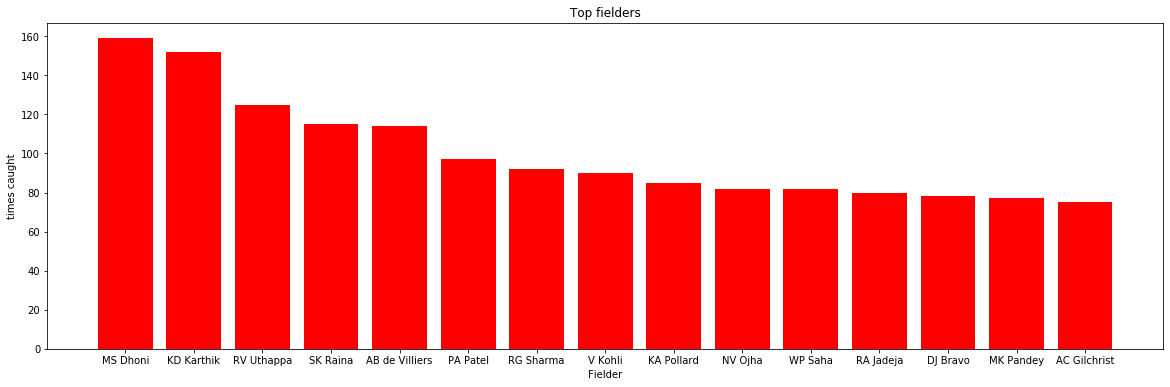

In [16]:
plt.gcf().set_size_inches(20,6)
plt.xlabel('Fielder')
plt.ylabel('times caught')
plt.title('Top fielders')
plt.bar(fielder, wicket_count, color = 'red')

plt.show()


In [17]:
k=spark.sql("select distinct(bowler) ,count(bowler) as count1 from data where batsman_runs='4' or batsman_runs='6' group by bowler order by count1 desc").collect()

In [18]:
boundaries_given = []
bowler = []

for i in range(15):
    boundaries_given.append(k[i].count1)
    bowler.append(k[i].bowler)

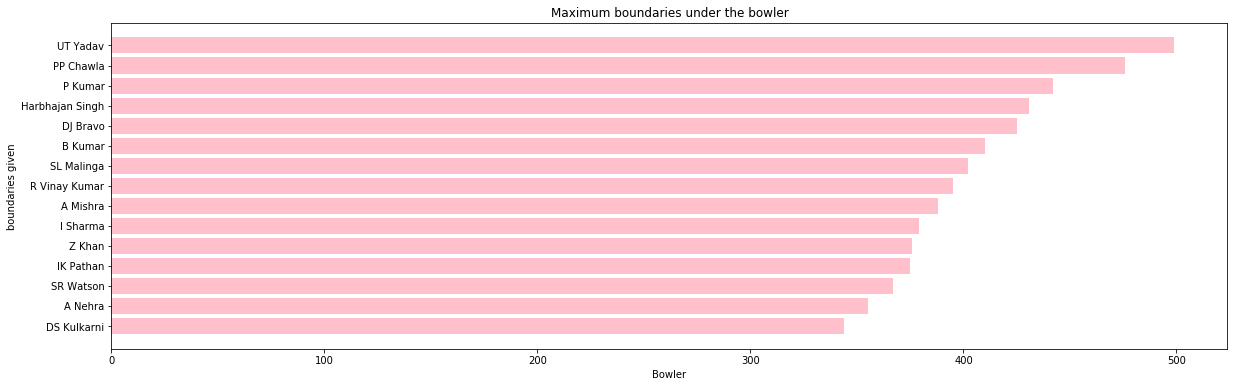

In [19]:
plt.gcf().set_size_inches(20,6)
plt.xlabel('Bowler')
plt.ylabel('boundaries given')
plt.title('Maximum boundaries under the bowler')
plt.barh(bowler,boundaries_given, color = 'pink')
plt.gca().invert_yaxis()
plt.show()


In [20]:
k=spark.sql("select distinct(batting_team) as a ,count(*) as count1 from data where is_super_over not in ('0') group by batting_team order by count1 desc ").collect()
print(k)

[Row(a='Rajasthan Royals', count1=14), Row(a='Kolkata Knight Riders', count1=13), Row(a='Royal Challengers Bangalore', count1=12), Row(a='Kings XI Punjab', count1=11), Row(a='Gujarat Lions', count1=8), Row(a='Sunrisers Hyderabad', count1=7), Row(a='Delhi Capitals', count1=6), Row(a='Mumbai Indians', count1=5), Row(a='Chennai Super Kings', count1=5)]


In [21]:
super_overs_faced = []
team = []

for i in range(9):
    super_overs_faced.append(k[i].count1)
    team.append(k[i].a)

/Users/rahulgarg97/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Unrecognized location 'left center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


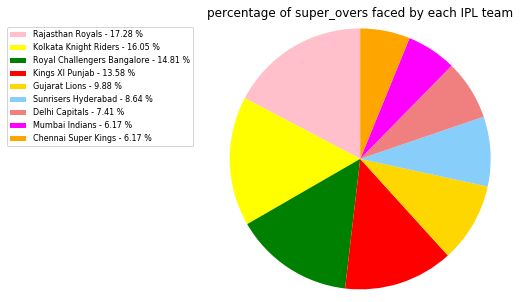

In [22]:
labels = [i for i in team]
explode = (0.1, 0, 0, 0, 0, 0)
plt.title('percentage of super_overs faced by each IPL team')
x = np.char.array(team)
y = np.array(super_overs_faced)
colors = ['pink','yellow','green','red','gold','lightskyblue','lightcoral','magenta','orange']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))
plt.gcf().set_size_inches(10,5)
plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
plt.show()

In [23]:
k=spark.sql("select distinct(bowler) as bowler ,count(*)/6 as overs from data group by bowler ").collect()

k1=spark.sql("select distinct(bowler) as bowler ,sum(total_runs) as runs from data group by bowler ").collect()

bowler=[]
economy=[]
for i in range(10):
    bowler.append(k[i].bowler)
    rate=k1[i].runs/k[i].overs
    economy.append(rate)
print(bowler)
print(economy)

['Kuldeep Yadav', 'TM Dilshan', 'A Roy', 'KA Pollard', 'M Muralitharan', 'LA Carseldine', 'J Botha', 'DR Smith', 'Jaskaran Singh', 'A Flintoff']
[8.39856801909308, 8.02909090909091, 5.6, 8.393416927899686, 6.698292220113852, 5.142857142857142, 6.922425952045134, 8.88689407540395, 9.405405405405405, 9.636363636363637]


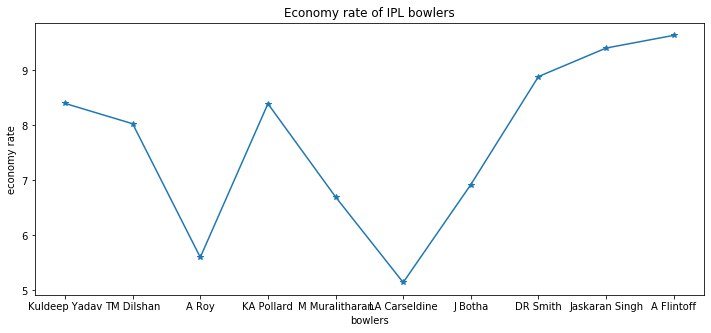

In [24]:
plt.gcf().set_size_inches(12, 5)
plt.xlabel('bowlers')
plt.ylabel('economy rate')
plt.title('Economy rate of IPL bowlers')
plt.plot(bowler, economy, marker='*')
plt.xticks(bowler)
plt.show()

In [25]:
matches_df.createOrReplaceTempView("matches")

In [26]:
type(deliveries_df)

pyspark.sql.dataframe.DataFrame

In [27]:
deliveries = spark.createDataFrame(deliveries)

In [28]:
deliveries.createOrReplaceTempView("deliveries")

In [29]:
df1 = spark.sql("select match_id, batting_team, sum(total_runs)/count(dismissal_kind) as Runs_per_Wicket from deliveries group by match_id, batting_team order by cast(match_id as int)")

In [30]:
df1= df1.withColumn("new_column",lit("ABC"))
w = Window().partitionBy('new_column').orderBy(lit('A'))
df1 = df1.withColumn("row_num", row_number().over(w)).drop("new_column")

In [31]:
df1.createOrReplaceTempView("df1")

In [32]:
row_odd = spark.sql('select * from df1 where row_num%2 !="0"')
row_even = spark.sql('select * from df1 where row_num%2 ="0"')

In [33]:
row_odd.createOrReplaceTempView("row_odd")
row_even.createOrReplaceTempView("row_even")

In [34]:
rpw_odd_row = spark.sql("select row_odd.match_id, row_odd.batting_team, row_odd.Runs_per_Wicket/row_even.Runs_per_Wicket as Runs_per_Wicket_Ratio from row_odd join row_even where row_odd.match_id = row_even.match_id")

In [35]:
rpw_even_row = spark.sql("select row_even.match_id, row_even.batting_team, row_even.Runs_per_Wicket/row_odd.Runs_per_Wicket as Runs_per_Wicket_Ratio from row_odd join row_even where row_odd.match_id = row_even.match_id")

In [36]:
rpw_odd_row.createOrReplaceTempView("rpw_odd")
rpw_even_row.createOrReplaceTempView("rpw_even")

In [37]:
rpw_ratio = spark.sql("select rpw_odd.match_id, rpw_odd.batting_team as team_1, rpw_odd.Runs_per_Wicket_Ratio, rpw_even.batting_team as team_2, rpw_even.Runs_per_Wicket_Ratio from rpw_odd join rpw_even where rpw_odd.match_id = rpw_even.match_id order by rpw_odd.Runs_per_Wicket_Ratio desc, rpw_even.Runs_per_Wicket_Ratio desc")

# Runs per Wicket Ratio for each team in every match played

In [38]:
rpw_ratio.show()

+--------+------+---------------------+------+---------------------+
|match_id|team_1|Runs_per_Wicket_Ratio|team_2|Runs_per_Wicket_Ratio|
+--------+------+---------------------+------+---------------------+
|     101|    RR|   13.431818181818182|   RCB|  0.07445008460236886|
|      44|    MI|   10.707070707070708|  DCap|  0.09339622641509433|
|     578|   KKR|    10.10204081632653|  DCap|    0.098989898989899|
|     572|    MI|   10.088495575221238|   SRH|  0.09912280701754386|
|     372|   RCB|    9.974226804123711|  DCap|  0.10025839793281655|
|     296|  KXIP|    9.586776859504132|   RCB|  0.10431034482758621|
|     283|   RCB|                9.216|   KTK|  0.10850694444444445|
|    7897|   SRH|     9.13533834586466|    RR|   0.1094650205761317|
|      60|   KKR|     9.02439024390244|   RCB|   0.1108108108108108|
|   11147|   SRH|    8.737499999999999|   RCB|  0.11444921316165951|
|     300|    DC|     8.53448275862069|  KXIP|  0.11717171717171716|
|     562|   RCB|    8.39285714285

In [39]:
rpw_ratio.createOrReplaceTempView("rpw_ratio")

In [40]:
rr = spark.sql("select match_id, batting_team, sum(total_runs)/(count(ball)/6) as Runs_Rate from deliveries group by match_id, batting_team order by cast(match_id as int)")

In [41]:
rr= rr.withColumn("new_column",lit("ABC"))
w1 = Window().partitionBy('new_column').orderBy(lit('A'))
rr = rr.withColumn("row_num", row_number().over(w1)).drop("new_column")

In [42]:
rr.createOrReplaceTempView("rr")

In [43]:
rr_row_odd = spark.sql('select * from rr where row_num%2 !="0"')
rr_row_even = spark.sql('select * from rr where row_num%2 ="0"')

In [44]:
rr_row_odd.createOrReplaceTempView("rr_row_odd")
rr_row_even.createOrReplaceTempView("rr_row_even")

# Net Run Rate for each match played

In [45]:
nrr = spark.sql("select rr_row_odd.match_id, rr_row_odd.batting_team as team_1, rr_row_even.batting_team as team_2, (rr_row_odd.Runs_rate-rr_row_even.Runs_rate) as Net_Match_Run_Rate from rr_row_odd join rr_row_even where rr_row_odd.match_id = rr_row_even.match_id order by Net_Match_Run_Rate desc")

In [46]:
nrr.createOrReplaceTempView("nrr")

In [47]:
from pyspark.sql.functions import *

In [48]:
from pyspark.sql import functions as f

In [49]:
nrr = nrr.withColumn('teams', 
                    f.concat(f.col('team_1'),f.lit(','), f.col('team_2')))
new_nrr = nrr.select("teams", "Net_Match_Run_Rate").collect()

In [51]:
NMRR = []
team12 = []

for i in range(30):
    NMRR.append(new_nrr[i].Net_Match_Run_Rate)
    team12.append(new_nrr[i].teams)
list_teams_nmrr = [[x,y] for x,y in zip(team12, NMRR)]
print(list_teams_nmrr)

[['KTK,RR', 7.099557522123893], ['RCB,GL', 6.996721311475411], ['KKR,RCB', 5.870648355158096], ['RCB,PW', 5.840320121951219], ['SRH,RCB', 5.700060471679096], ['MI,DCap', 5.166415662650603], ['RCB,KXIP', 4.961658751303139], ['DC,MI', 4.6859220779220765], ['KXIP,DCap', 4.604308390022676], ['CSK,KXIP', 4.470725995316158], ['KXIP,RCB', 4.198562443845463], ['RR,DCap', 4.145853658536585], ['RR,KXIP', 3.975302419354838], ['MI,DCap', 3.697634653747505], ['DC,KXIP', 3.6585365853658534], ['RCB,KTK', 3.551900170164494], ['CSK,DCap', 3.543192660550459], ['RR,MI', 3.50566924778761], ['RCB,RR', 3.407542026351658], ['KXIP,SRH', 3.338709677419354], ['KKR,RR', 3.3348837209302316], ['MI,DCap', 3.3089213362892744], ['CSK,RCB', 3.223790322580644], ['CSK,DCap', 3.1311550851357586], ['RCB,RR', 3.050256410256411], ['RCB,RR', 3.0258320914058623], ['RR,RCB', 2.9710866141732275], ['RPS,RCB', 2.9372251099560174], ['KXIP,RCB', 2.8928473554398453], ['MI,RCB', 2.882769472856019]]


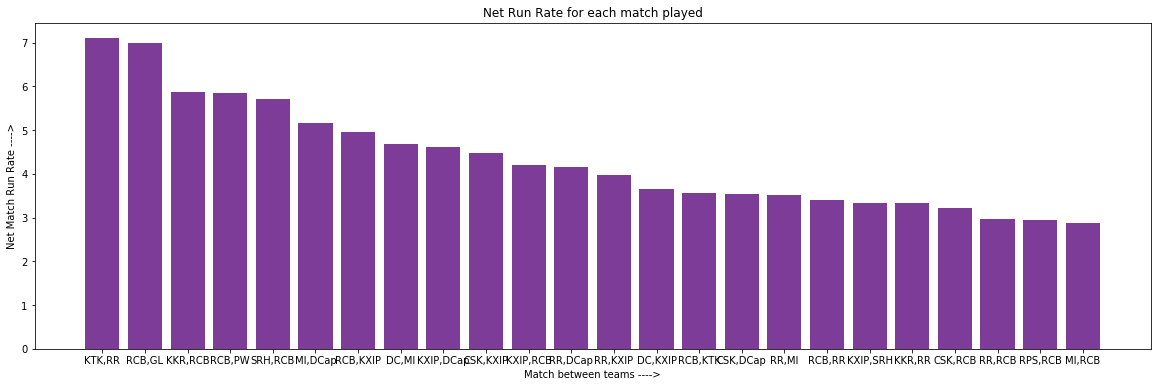

In [52]:
import matplotlib.pyplot as plt
plt.gcf().set_size_inches(20,6)
plt.xlabel('Match between teams ---->')
plt.ylabel('Net Match Run Rate ---->')
plt.title('Net Run Rate for each match played')
plt.bar(team12, NMRR, color = '#7D3C98')
plt.show()

In [53]:
nrr.createOrReplaceTempView("nrr")

In [54]:
whole_df = spark.sql("select * from deliveries join matches where deliveries.match_id = matches.id ")

In [55]:
whole_df.createOrReplaceTempView("whole_df")

In [56]:
team_rr = spark.sql("select season, batting_team, (sum(total_runs)/(count(ball)/6)) as Batting_Run_Rate from whole_df group by season, batting_team order by season, batting_team")

In [57]:
team_rr.createOrReplaceTempView("team_rr")

In [58]:
opponent_rr = spark.sql("select season, bowling_team, (sum(total_runs)/(count(*)/6)) as Bowler_Run_Rate from whole_df group by season, bowling_team order by season, bowling_team")

In [59]:
opponent_rr.createOrReplaceTempView("opponent_rr")

In [60]:
ntrr = spark.sql("select team_rr.season, team_rr.batting_team, team_rr.Batting_Run_Rate - opponent_rr.Bowler_Run_Rate as Net_Tournament_Run_Rate from team_rr join opponent_rr where team_rr.season = opponent_rr.season and team_rr.batting_team = opponent_rr.bowling_team order by Net_Tournament_Run_Rate desc")

In [61]:
ntrr.createOrReplaceTempView("ntrr")

# Teams with Net Tournament Run Rate over the last decade

In [62]:
overall_ntrr = spark.sql("select batting_team, sum(Net_Tournament_Run_Rate) as NTRR_till_date from ntrr group by batting_team").collect()

In [63]:
all_ntrr = []
team = []

for i in range(13):
    all_ntrr.append(overall_ntrr[i].NTRR_till_date)
    team.append(overall_ntrr[i].batting_team)
    
list_team_ntrr = [[x,y] for x,y in zip(team, all_ntrr)]
print(list_team_ntrr)

[['KKR', 0.2962551662002104], ['DC', -0.5134523620310727], ['GL', -0.8815052358533366], ['RR', -0.7691372289629683], ['MI', 2.3896641729433172], ['CSK', 2.9488271320355812], ['DCap', -1.69561782461928], ['SRH', 0.6246715585377602], ['RCB', -0.2770003921511419], ['RPS', 0.20310955335772451], ['KTK', -0.1730386927281362], ['PW', -1.5253682214721138], ['KXIP', -2.3780797145387087]]


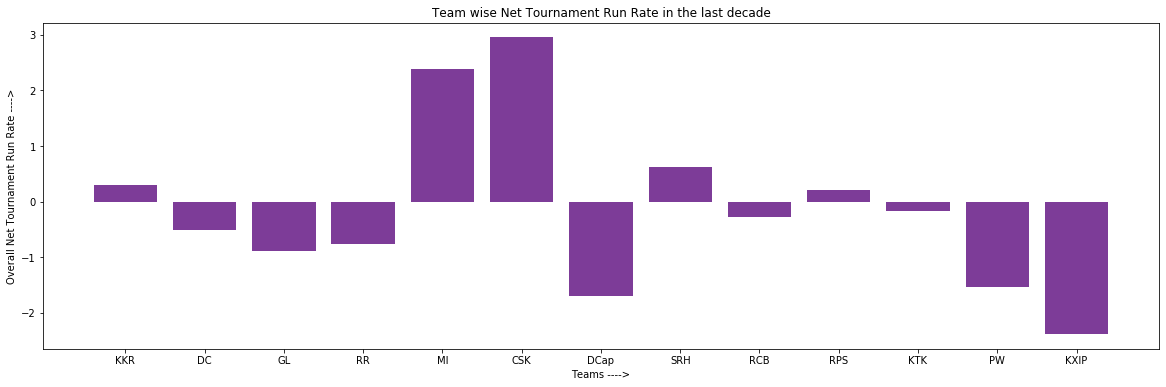

In [64]:
import matplotlib.pyplot as plt
plt.gcf().set_size_inches(20,6)
plt.xlabel('Teams ---->')
plt.ylabel('Overall Net Tournament Run Rate ---->')
plt.title('Team wise Net Tournament Run Rate in the last decade')
plt.bar(team, all_ntrr, color = '#7D3C98')
plt.show()

# No. of times, teams achieved positive Net run rate for tournaments over the last decade

This stat can help investors choosing the right team to invest their money into.

In [65]:
team_bet = spark.sql("select batting_team as team, count(*) as num_of_times_had_positive_NRR from ntrr where Net_Tournament_Run_Rate > 0 group by batting_team order by count(*) desc").collect()

In [66]:
team_bet

[Row(team='MI', num_of_times_had_positive_NRR=9),
 Row(team='CSK', num_of_times_had_positive_NRR=9),
 Row(team='KKR', num_of_times_had_positive_NRR=7),
 Row(team='DCap', num_of_times_had_positive_NRR=7),
 Row(team='RCB', num_of_times_had_positive_NRR=5),
 Row(team='SRH', num_of_times_had_positive_NRR=4),
 Row(team='RR', num_of_times_had_positive_NRR=3),
 Row(team='KXIP', num_of_times_had_positive_NRR=3),
 Row(team='DC', num_of_times_had_positive_NRR=2),
 Row(team='RPS', num_of_times_had_positive_NRR=1)]

In [67]:
positive_ntrr = []
team = []

for i in range(10):
    positive_ntrr.append(team_bet[i].num_of_times_had_positive_NRR)
    team.append(team_bet[i].team)
print(positive_ntrr)
print(team)
list_positive_team_ntrr = [[x,y] for x,y in zip(team, positive_ntrr)]
print(list_positive_team_ntrr)

[9, 9, 7, 7, 5, 4, 3, 3, 2, 1]
['MI', 'CSK', 'KKR', 'DCap', 'RCB', 'SRH', 'RR', 'KXIP', 'DC', 'RPS']
[['MI', 9], ['CSK', 9], ['KKR', 7], ['DCap', 7], ['RCB', 5], ['SRH', 4], ['RR', 3], ['KXIP', 3], ['DC', 2], ['RPS', 1]]


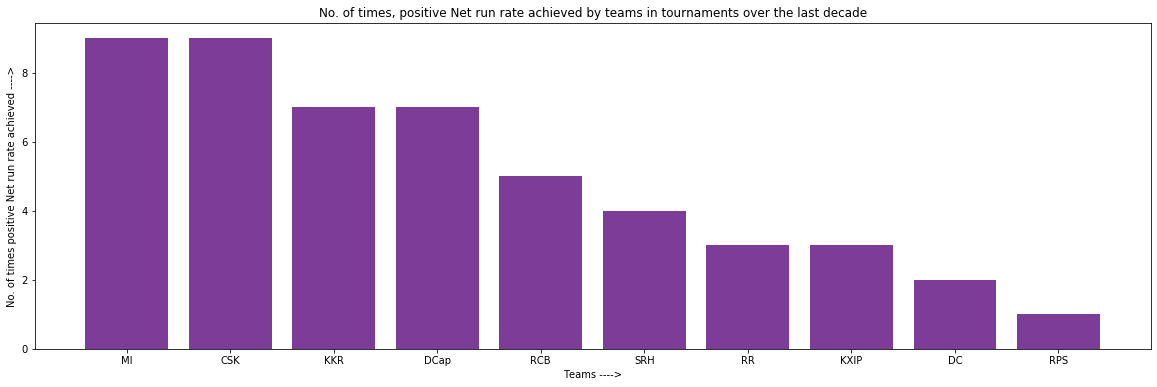

In [68]:
import matplotlib.pyplot as plt
plt.gcf().set_size_inches(20,6)
plt.xlabel('Teams ---->')
plt.ylabel('No. of times positive Net run rate achieved ---->')
plt.title('No. of times, positive Net run rate achieved by teams in tournaments over the last decade')
plt.bar(team, positive_ntrr, color = '#7D3C98')
plt.show()